# Mnist Data 로 학습하기

MNIST database 란 (Modified National Institute of Standards and Technology database) 의 약자로서 미국에서 사람의 손글씨 학습을 위해 수집된 숫자 손글씨의 모음데이터이다. 원래는 Nist 데이터라고 불렸는데 이를 머신러닝에 적합하게 수정함으로서 Modified NIST 의 약자로 MNIST라 불린다.  주로 28x28 의 작은 60000 개의 학습이미지와 10000 개의 테스트 이미지로 구성되어있으며 각각에 대한 레이블 값도 제공된다. 

요즘은 28x28 로 구성된 작은 학습이미지 샘플 자체를 MNIST라고 부르기도 한다. 

## Mnist Data 생성

Mnist 는 Torchvision 이라는 torch 의 보조 라이브러리통해 제공된다. 

In [1]:
import torch as tc
import torchvision as tcv


이제  Mnist 데이터를 읽어들여보겠다. 약 3-4분정도가 소요된다. 

In [2]:
mnist = tcv.datasets.MNIST( root = './data', train = True,  download=True)


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw




Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw




Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


이제 읽어들인 데이터를 한번 살펴보자.  dir 은 클래스의 각종 멤버 변수와 함수를 보여준다. 

In [3]:
print("type:",type(mnist))
dir(mnist)


type: <class 'torchvision.datasets.mnist.MNIST'>


['__add__',
 '__class__',
 '__class_getitem__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__orig_bases__',
 '__parameters__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_exists',
 '_format_transform_repr',
 '_repr_indent',
 'class_to_idx',
 'classes',
 'data',
 'download',
 'extra_repr',
 'mirrors',
 'processed_folder',
 'raw_folder',
 'resources',
 'root',
 'target_transform',
 'targets',
 'test_data',
 'test_file',
 'test_labels',
 'train',
 'train_data',
 'train_labels',
 'training_file',
 'transform',
 'transforms']

보면 멤버중에 data 라는 멤버가 보인다.  이 내용을 한번 보기로 하자

In [4]:
print("data type:", mnist.data)
print("data shape:",mnist.data.shape)


data type: tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        ...,

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
 

보면 data 멤버는 60000 x 28 x 28 의 구조로 저장되어 있는 텐서임을 알 수 있다. 이를 통해 한 이미지의 크기가 28x28 이며 총 60000 개의 이미지가 있음을 유추해볼 수 있다.  이번에는 train_labels 도 확인해보자. 



In [5]:
print("train labels:", mnist.train_labels)
print("train labels shape:", mnist.train_labels.shape)

train labels: tensor([5, 0, 4,  ..., 5, 6, 8])
train labels shape: torch.Size([60000])


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:54: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


train_labels 는 6만개의 이미지가 각각 어떤 숫자를 표현하는지가 나와있다. 

## Mnist Data 시각화

Mnist 가 실제로 어떤 형태의 이미지인지 확인하기 위해 첫번째 이미지를 추출해 imshow 를 사용해 표시해보자 

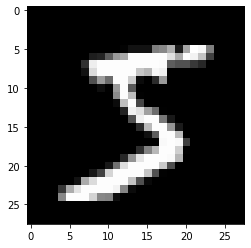

In [6]:
import numpy as np 
import matplotlib.pyplot as plt 

first = mnist.data[0]
plt.imshow(first, cmap = 'gray')

이번에는 처음 4개의 이미지를 추출해서 sample 이라는 텐서 를 생성해보도록 핵ㅆ다. 

In [7]:
sample = mnist.data[:4]
slabels = mnist.train_labels[:4]

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:54: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


4개의 이미지도 한번 확인해보자. 

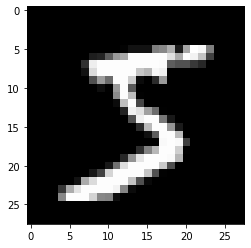

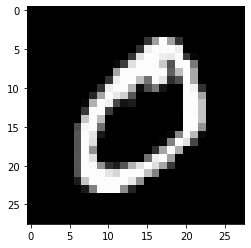

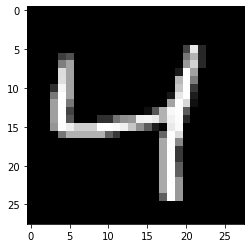

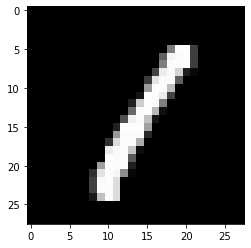

tensor([5, 0, 4, 1])


In [8]:
import matplotlib.pyplot as plt
for img in sample:
  plt.imshow(img, cmap = 'gray')
  plt.show()

print(slabels)


## Sample 학습해보기 

이제 위에서 추출한 4개의 샘플을 신경망을 통해서 학습하하도록 해보겠다. linear모델을 위해 4x28x28 형태인 sample 을 4x784 의 2차원 배열로 변환해 x 를 만든다. 



In [9]:
x = sample.view(-1, 28 * 28)
print(x.shape)
x


torch.Size([4, 784])


tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]], dtype=torch.uint8)

그런데 위의 x 는 정수형이므로 신경망의 입력으로는 적절치 안다. 이를 위해서는 다음 구문을 이용해  Float으로 변환을 해준다. 

In [10]:
x = x.type(tc.FloatTensor)
x

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

### One-hot encoding 

그런데 label 값은 0,1,2,3 같은 정수형으로 되어있다. 하지만 이것은 분류문제이므로 이것을 학습할 때는 
```
0 -> [1,0,0,0 .. ]
1 -> [0,1,0,0 .. ]
2 -> [0,0,1,0 .. ]

```
이런식으로 각각의 클래스마다 출력값을 주는 방식을 사용하는게 효율적이다.  이렇게 각각의 labels 마다 해당하는 출력을 주고 해당하는 출력만 타겟을 1로 하고 나머지는 0으로 세팅하는 방법을 One-hot encoding 이라고 한다. 


torch 에서는 이런 함수를 이용해 scatter 라는 함수를 사용한다. scatter 는 특정 인덱스에 배열에 특정 값을 뿌려주는 역할을 한다. 

In [11]:
t = tc.tensor([0,0,0,0,0])
idx = tc.tensor([1,3])

print( t.scatter(0,idx,9))

tensor([0, 9, 0, 9, 0])


처음 0 은 배열의 차원을 의미하는 이를 통해 다음과 같이 2차원에도 적용이 가능하다. 

In [12]:
t = tc.tensor([[0,0,0,0,0],[0,0,0,0,0]])
idx = tc.tensor([[1],[3]])
print( t.scatter(1,idx,1))

tensor([[0, 1, 0, 0, 0],
        [0, 0, 0, 1, 0]])


이제 이것을 이용해 위의 4개의 labels 값에 해당하는 one-hot encoding y를 만들 수 있다. 

In [13]:
y = tc.zeros(4,10).scatter_(1,slabels.view(-1,1), 1)
y

tensor([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

### nn 모델 구성 

이제 앞에서 배운 nn 모델을 활용해 784 크기의 입력과 10개의 출력 10개의 히든을 갖는 모델을 구성해보도록 하겠다. 

In [14]:
import torch.nn as nn 
model = nn.Sequential(
    nn.Linear(28 * 28, 10),
    nn.Sigmoid(),
    nn.Linear(10, 10),
    nn.Sigmoid()
)

model(x)
# 최소 800개면 못해도 반은 가야함, 히든레이어 부족 

tensor([[0.5713, 0.6314, 0.6069, 0.4621, 0.6425, 0.4910, 0.6973, 0.6354, 0.4918,
         0.5808],
        [0.5714, 0.6313, 0.6068, 0.4622, 0.6424, 0.4908, 0.6972, 0.6353, 0.4919,
         0.5807],
        [0.5181, 0.5632, 0.6589, 0.5305, 0.6512, 0.4981, 0.7422, 0.6237, 0.4908,
         0.6509],
        [0.5855, 0.5047, 0.7149, 0.4590, 0.6543, 0.4688, 0.6255, 0.6226, 0.4946,
         0.5427]], grad_fn=<SigmoidBackward>)

이제 optimizer 를 생성한다. 

In [15]:
import torch.optim as optim

optimizer = optim.SGD( model.parameters() , lr = 0.1)



이제 학습을 시작해보도록 하겠다. 

In [16]:
ds = []
for step in range(10000):
  o = model(x)
  d = nn.functional.mse_loss(o, y)
  optimizer.zero_grad() # 경사값 weight값 재갱신
  d.backward()
  optimizer.step() 
  
  ds += [d.item()]
  if step % 100 == 0 : 
    print("err:",d.item())



err: 0.3321351408958435
err: 0.14372918009757996
err: 0.09862213581800461
err: 0.08140703290700912
err: 0.07209815829992294
err: 0.06589855253696442
err: 0.061268795281648636
err: 0.05758913233876228
err: 0.05455788969993591
err: 0.052003584802150726
err: 0.049816910177469254
err: 0.04792248085141182
err: 0.046265535056591034
err: 0.04480477795004845
err: 0.04350823909044266
err: 0.04235067218542099
err: 0.04131177440285683
err: 0.040375035256147385
err: 0.03952682763338089
err: 0.03875584155321121
err: 0.038052577525377274
err: 0.0374089851975441
err: 0.0368182510137558
err: 0.03627448529005051
err: 0.0357726588845253
err: 0.03530839458107948
err: 0.03487787023186684
err: 0.03447778895497322
err: 0.03410521149635315
err: 0.03375757858157158
err: 0.03343261778354645
err: 0.033128321170806885
err: 0.03284289315342903
err: 0.032574739307165146
err: 0.03232242166996002
err: 0.03208467364311218
err: 0.03186033293604851
err: 0.03164836764335632
err: 0.031447842717170715
err: 0.0312579013407

이제 오류율 그래프를 확인한다. 

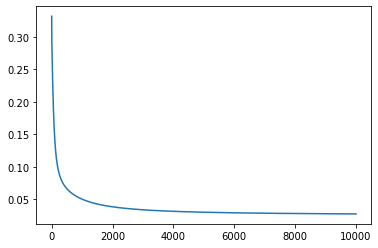

In [17]:

plt.plot(ds)

마지막 출력은 텐서변수 o 를 통해 확인이 가능하다.  출력은 반올림을 통해 0과  1로 확인을 해준다.  또한 argmax 를 사용하면 직접 label 값을 추출할 수도 있다. 

In [18]:
print(tc.round( o )) # 학습끝난후 4개값->반올림된다 
# print(o)
print(tc.argmax(o, dim = 1)) # max값의 인덱스를 변환해주는것 , 축이 1이니까 가로축이 1인데. 망이예측한결과를한번에 볼수있다 
# 원핫인코딩은 어느축이 제일 세게나오는가가 중요함 

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], grad_fn=<RoundBackward>)
tensor([0, 0, 4, 1])


## 1000개의 Mnist 데이터 학습해보기 

이번에는 조금 더 제대로된 학습을 위해서 1000개의 데이터를 학습해보도록 하겠다. 이제  위의 mnist data 에서 한번에 1000개의 데이터를 빼내보도록 하겠다. 

In [20]:
tr_n = 1000 #트레이닝 데이터의 갯수

x = mnist.data[:tr_n].view(-1,28*28).type(tc.FloatTensor) #천까지 꺼내고 데이터를 784*1000 편다 그리고 실수형변환 
labels = mnist.train_labels[:tr_n] # 1000까지 
y =  tc.zeros(tr_n,10).scatter(1, labels.view(-1,1), 1)


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:54: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


이제 위에 있는 모델을 통해서 학습을 수행해보도록 하겠다. 



err: 0.13108980655670166
err: 0.08236584812402725
err: 0.08069528639316559
err: 0.079799585044384
err: 0.0790894404053688
err: 0.0786271020770073
err: 0.07828505337238312
err: 0.07768537849187851
err: 0.07725211977958679
err: 0.07683221250772476


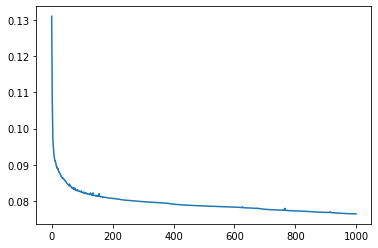

In [21]:
ds = []
for step in range(1000):
  o = model(x)
  d = nn.functional.mse_loss(o, y)
  optimizer.zero_grad() 
  d.backward()
  optimizer.step() 

  ds += [d.item()]
  if step % 100 == 0 : 
    print("err:",d.item())

plt.plot(ds)

### 매칭 결과 체크

학습이 잘 수행되는 듯 할 것이다. 하지만 과연 1000개의 이미지중에 몇개나 맞추고 있는걸까? 이를 확인하는 방법을 알아보자. 

In [22]:
print(tc.argmax(o, dim = 1)) # 초기화값이 영향을 준모양..흠 5041만 나오니까 

tensor([0, 0, 4, 1, 4, 4, 1, 4, 1, 4, 0, 0, 4, 4, 1, 4, 4, 4, 4, 4, 4, 0, 4, 1,
        0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 4, 0, 4, 4, 1, 4, 4, 4, 4, 4, 4, 5,
        4, 0, 0, 0, 4, 4, 4, 4, 0, 4, 4, 1, 4, 4, 4, 0, 4, 4, 4, 1, 0, 0, 1, 4,
        1, 4, 0, 0, 4, 1, 1, 4, 4, 0, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 0,
        4, 4, 4, 1, 5, 4, 1, 4, 1, 1, 4, 4, 4, 4, 4, 4, 1, 1, 0, 4, 4, 4, 0, 0,
        4, 0, 4, 4, 1, 4, 4, 4, 1, 4, 4, 4, 0, 4, 4, 4, 1, 4, 0, 4, 4, 1, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 0, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4,
        4, 0, 4, 4, 4, 1, 1, 0, 4, 1, 4, 4, 1, 4, 0, 4, 1, 4, 4, 0, 4, 4, 4, 4,
        0, 4, 4, 4, 4, 4, 4, 4, 1, 1, 4, 0, 4, 1, 0, 4, 1, 0, 0, 1, 4, 4, 4, 4,
        0, 4, 4, 5, 0, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 1, 4, 4, 0, 4, 0, 4, 4, 0,
        4, 4, 4, 4, 4, 4, 0, 4, 1, 0, 4, 1, 4, 4, 0, 4, 4, 4, 4, 0, 0, 4, 0, 4,
        4, 4, 0, 4, 4, 1, 1, 4, 4, 0, 4, 4, 1, 4, 0, 4, 4, 4, 4, 0, 4, 4, 4, 0,
        4, 4, 1, 4, 4, 0, 4, 4, 0, 4, 4,

위의 출력은 실제 출력값중에 최대값을 출력해본 것이다. 이것을 labels 와 비교하면 다음과 같다. 

In [23]:
print( tc.argmax(o,dim=1) == labels) # 샘플에대한 y값 labels 
# 예측해야하는값과 예측한 값의 동일여부 True는 둘이 같은것이고 False는 다른것, 대부분 False네 

tensor([False,  True,  True,  True, False, False,  True, False,  True,  True,
        False, False, False, False,  True, False, False, False, False, False,
         True,  True, False,  True, False, False,  True, False, False, False,
        False, False, False, False,  True, False, False,  True, False, False,
         True, False, False, False, False, False, False,  True, False, False,
        False,  True, False,  True, False, False,  True, False,  True,  True,
         True,  True, False,  True,  True, False, False,  True,  True,  True,
         True, False,  True, False, False,  True, False,  True,  True, False,
        False,  True, False, False, False, False, False, False,  True,  True,
        False, False,  True, False, False,  True, False, False, False,  True,
         True, False,  True, False,  True,  True, False, False, False, False,
        False, False,  True,  True,  True,  True, False, False,  True,  True,
        False,  True, False, False,  True, False, False,  True, 

위의 결과중에 True 는 실제 학습한 신경망이 올바른 레이블에 해당하는 노드를 최대값으로 출력했음을 의미한다.  그러므로 True 의 숫자를 카운트하고 이를 1000으로 나누면 실제 매칭률을 구할 수 있다. True 숫자는 tc.sum() 으로 구할 수 있다. 

In [24]:
match_rate = tc.sum( tc.argmax(o, dim =1) == labels ) / 1000 # sum을 걸면 True만 1로 합산해준다 , 매칭률보기위해 1000으로 나눔 0.3840 -> 384개 맞춘것
print(match_rate)

tensor(0.3250)


이제 매칭률을 출력하며 학습을 해보도록 하겠다. 


match rate:0.325, err:0.07640
match rate:0.325, err:0.07610
match rate:0.326, err:0.07586
match rate:0.326, err:0.07544
match rate:0.326, err:0.07522
match rate:0.327, err:0.07499
match rate:0.327, err:0.07475
match rate:0.330, err:0.07451
match rate:0.330, err:0.07424
match rate:0.335, err:0.07397


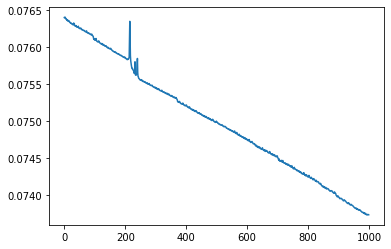

In [25]:
ds = []
for step in range(1000): # 10000
  o = model(x)
  d = nn.functional.mse_loss(o, y)
  optimizer.zero_grad() 
  d.backward()
  optimizer.step() 

  ds += [d.item()]
  if step % 100 == 0 : # 1000
    match_rate = tc.sum( tc.argmax(o, dim =1) == labels ) / tr_n

    print("match rate:{:.3f}, err:{:.5f}".format(match_rate,d.item()) ) 

plt.plot(ds)

### 더 복잡한 모델 사용하기

아마 매칭률이 0.8정도에서 정체된걸 볼 수 있을것이다. 그러면 이게 한계일까?  사실 약 800개의 입력을 처리하기에는 히든노드 10개는 너무나 부족하다. 이번에는 높은 매칭률을 가질 수 있는 모델을 구성해보자. 



In [26]:
import torch.nn as nn 
import torch.optim as optim

model = nn.Sequential(
    nn.Linear(28 * 28, 800),
    nn.Sigmoid(),
    nn.Linear(800, 80),
    nn.Sigmoid(),    
    nn.Linear(80, 10),
    nn.Sigmoid()
)



optimizer = optim.SGD( model.parameters() , lr = 0.1)
model(x)
# 입력값과 같은 수의 히든레이어 800. 히든도 2단계로 놓고 

tensor([[0.4542, 0.3318, 0.3935,  ..., 0.4719, 0.4938, 0.5168],
        [0.4598, 0.3263, 0.3938,  ..., 0.4593, 0.4891, 0.5223],
        [0.4531, 0.3164, 0.3911,  ..., 0.4583, 0.4847, 0.5274],
        ...,
        [0.4619, 0.3281, 0.3754,  ..., 0.4715, 0.4915, 0.5197],
        [0.4739, 0.3293, 0.3861,  ..., 0.4647, 0.4912, 0.5313],
        [0.4527, 0.3203, 0.3849,  ..., 0.4771, 0.4916, 0.5337]],
       grad_fn=<SigmoidBackward>)

위의 모델은 히든을 800 - 80 으로 2단계로 배치했다.  이 모델은 95% 이상의 매칭률을 보일 수 있는 구성이다. 하지만  위의 노드를 1000회만 돌려봐도 속도가 매우 느리다는 것을 알 수 있을 것이다. 사실 중간노드 800개는 784 x 800 의 웨이트를 생성하기 때문에 실제로 80배 이상 계산이 늘어난다. 

In [27]:
ds = []
for step in range(1000):
  o = model(x)
  d = nn.functional.mse_loss(o, y) # o는 x로부터 파생되어있으므로 
  optimizer.zero_grad() 
  d.backward()
  optimizer.step() 

  ds += [d.item()]
  if step % 100 == 0 : 
    match_rate = tc.sum( tc.argmax(o, dim =1) == labels ) / 1000
    print("match rate:{:.3f}, err:{:.5f}".format(match_rate,d.item()) ) 
# 문제는 계산량이 최소 80배 늘어남 
# gpu 썼을때 훨신 좋아진다 

match rate:0.100, err:0.21311
match rate:0.200, err:0.09095
match rate:0.224, err:0.08930
match rate:0.211, err:0.08887
match rate:0.209, err:0.08855
match rate:0.215, err:0.08822
match rate:0.231, err:0.08786
match rate:0.247, err:0.08745
match rate:0.277, err:0.08700
match rate:0.313, err:0.08647


### GPU를 사용한 학습

이 문제를 해결하는 가장  좋은 방법은 gpu 사용하는 것이다. 지금까지 우리는 cpu에서 계산을 수행했다. 하지만 gpu 를 사용하면 10배 이상의 속도를 얻을 수 있다.  gpu를 사용하기 위해서는 먼저 다음 구문을 이용해 'cuda' device를 생성한다. 

```
cuda = tc.device('cuda')
```

그 후에 계산에 사용되는 모델과 텐서를 다음과 같이 gpu로 업로드한다. 

```
x = x.to(cuda) # 업로드하는 모습 
y = y.to(cuda)
labels = labels.to(cuda)
model.to(cuda) # weight값은 모델에 있으므로 모델도 올려준다 
```

model 은 따로 대입문을 사용하지 안아도 무방하다.  그러면 이제 위의 구문을 실제로 수행해보겠다. 


In [28]:
# gpu 방법 cuda 딥러닝에서 항상 mbdi는 필수 
cuda = tc.device('cuda')
x = x.to(cuda)
y = y.to(cuda)
labels = labels.to(cuda)
model.to(cuda)

Sequential(
  (0): Linear(in_features=784, out_features=800, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=800, out_features=80, bias=True)
  (3): Sigmoid()
  (4): Linear(in_features=80, out_features=10, bias=True)
  (5): Sigmoid()
)

이제 위의 코드를 다시 실행핸다. 

In [29]:
ds = []
for step in range(10000):
  o = model(x)
  d = nn.functional.mse_loss(o, y)
  optimizer.zero_grad() 
  d.backward()
  optimizer.step() 

  ds += [d.item()]
  if step % 100 == 0 : 
    match_rate = tc.sum( tc.argmax(o, dim =1) == labels ) / tr_n
    print("match rate:{:.3f}, err:{:.5f}".format(match_rate,d.item()) ) 

match rate:0.341, err:0.08587
match rate:0.363, err:0.08518
match rate:0.391, err:0.08439
match rate:0.412, err:0.08350
match rate:0.427, err:0.08250
match rate:0.449, err:0.08141
match rate:0.477, err:0.08026
match rate:0.502, err:0.07906
match rate:0.527, err:0.07782
match rate:0.545, err:0.07655
match rate:0.566, err:0.07523
match rate:0.584, err:0.07385
match rate:0.601, err:0.07241
match rate:0.614, err:0.07090
match rate:0.631, err:0.06932
match rate:0.644, err:0.06768
match rate:0.663, err:0.06599
match rate:0.678, err:0.06426
match rate:0.690, err:0.06252
match rate:0.705, err:0.06076
match rate:0.726, err:0.05901
match rate:0.737, err:0.05729
match rate:0.757, err:0.05557
match rate:0.773, err:0.05387
match rate:0.790, err:0.05220
match rate:0.801, err:0.05057
match rate:0.817, err:0.04897
match rate:0.824, err:0.04741
match rate:0.834, err:0.04591
match rate:0.844, err:0.04445
match rate:0.860, err:0.04303
match rate:0.874, err:0.04165
match rate:0.880, err:0.04031
match rate

이제는 매우 빠른 속도로 매칭률 0.99 이상을 이룰 수 있을것이다. 

### 테스트 셋 사용해보기 

그런데 과연 트레이닝 데이터셋에 최적화된 모델이 정말로 숫자를 판별할 수 있을까? 그냥 저 데이터만 달달 외운것에 지나지 안을까?  실제로 특징의 학습을 떠나 학습데이터에만 지나치게 최적화될 경우 오히려 일반적인 판별능력이 떨어지는 현상이 존재한다.  이를 '과적합' 이라고 한다. 

이를 확인하기 위해서는 학습셋에 해당하지 안는 검증용 이미지를 활용해 검증을 하는 방법이 있다.  현재 0~999번 데이터를 학습에 사용하므로 1000~1099 번까지 100개의 이미지를 통해 검증을 해보도록 하겠다. 

먼저 테스트 셋 이미지와 레이블을 만든다. 

In [30]:
tt_n = 100
tx = mnist.data[tr_n:tr_n+tt_n].view(-1,28*28).type(tc.FloatTensor).to(cuda)
ty = mnist.train_labels[tr_n:tr_n+tt_n].to(cuda)


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:54: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


이제 이를 model 을 통해 검증을 해보도록 하겟다. 단 현재 모델은 gpu 에 올라가 있기 때문에 위의 tx,ty 도 gpu에 올려야 한다. 

In [ ]:
tx = tx.to(cuda)
ty = ty.to(cuda)

이제 현재 모델로 테스트용 아웃풋을 만든 후에 매칭률을 보도록 하겠다.  model(tx)를 통해서 test 이미지의 예측값을 구한 후에 위에서와 마찬가지로 argmax 로 label 값을 추출하고  이를 ty 와 비교한 후에 true를 카운트한다. 

In [ ]:
test_match = tc.sum( tc.argmax( model(tx) , dim = 1) == ty ) / 100 
print(test_match)

tensor(0.8300, device='cuda:0')


아마 약 80~90% 의 매칭률을 보였을 것이다.  그러면 이제 test_match의 변화도 보면서 위의 과정을 다시 수행해보도록 한다.  모델을 다시 생성해도 되지만 매번 수백만개의 웨이트를 다시  생성해서 gpu 에 올리는 시간을 절약하기 위해 다음 함수를 사용해보도록 하겠다. 

In [ ]:
def weight_reset(model):
  for name,m in model.named_children():
    if isinstance(m, nn.Conv2d) or isinstance(m, nn.Linear):        
        print("reset:", name)
        m.reset_parameters()

weight_reset(model)

reset: 0
reset: 2
reset: 4


이제 새로 실행하며 match rate 와 test match 의 변화를 구경해보자

In [ ]:

ds = []
for step in range(10000):
  o = model(x)
  d = nn.functional.mse_loss(o, y)
  optimizer.zero_grad() 
  d.backward()
  optimizer.step() 

  ds += [d.item()]
  if step % 1000 == 0 : 
    match_rate = tc.sum( tc.argmax(o, dim =1) == labels ) / tr_n
    test_match = tc.sum( tc.argmax( model(tx) , dim = 1) == ty ) / tt_n 
    print("match rate:{:.3f}, test match:{:.3f} err:{:.5f}".format(match_rate, test_match, d.item()) ) 

match rate:0.116, test match:0.160 err:0.26113
match rate:0.329, test match:0.320 err:0.08541
match rate:0.558, test match:0.500 err:0.07304
match rate:0.769, test match:0.630 err:0.05600
match rate:0.873, test match:0.710 err:0.04088
match rate:0.940, test match:0.760 err:0.02936
match rate:0.969, test match:0.780 err:0.02119
match rate:0.976, test match:0.790 err:0.01563
match rate:0.981, test match:0.810 err:0.01201
match rate:0.986, test match:0.810 err:0.00959


### <font color = '#FF7050'> 실습 : 10000 개로 학습하기 
위에서 한 과정을 트레이닝셋 10000개 테스트셋 1000 개로 다시 학습하고  그 결과를 확인해보자. 
</font>

In [ ]:
## 실습에 필요한 트레이닝, 테스트 데이터를 만드세요
tr_n,tt_n = 10000,1000
x = mnist.data[:tr_n].view(-1,28*28).type(tc.FloatTensor).to(cuda)
labels = mnist.train_labels[:tr_n]


y = tc.zeros(tr_n,10).scatter(1,labels.view(-1,1),1).to(cuda)

labels = labels.to(cuda)


tx = mnist.data[tr_n:tr_n+tt_n].view(-1,28*28).type(tc.FloatTensor).to(cuda)
ty = mnist.train_labels[tr_n:tr_n+tt_n].to(cuda)



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:54: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


In [ ]:
## 위의 데이터를 학습하며 학습결과를 확인하세요

ds = []
for step in range(10000):
  o = model(x)
  d = nn.functional.mse_loss(o, y)
  optimizer.zero_grad() 
  d.backward()
  optimizer.step() 

  ds += [d.item()]
  if step % 1000 == 0 : 
    match_rate = tc.sum( tc.argmax(o, dim =1) == labels ) / tr_n
    test_match = tc.sum( tc.argmax( model(tx) , dim = 1) == ty ) / tt_n 
    print("match rate:{:.3f}, test match:{:.3f} err:{:.5f}".format(match_rate, test_match, d.item()) ) 

match rate:0.864, test match:0.879 err:0.02495
match rate:0.935, test match:0.922 err:0.01610
match rate:0.950, test match:0.934 err:0.01326
match rate:0.957, test match:0.935 err:0.01146
match rate:0.963, test match:0.940 err:0.01017
match rate:0.965, test match:0.940 err:0.00918
match rate:0.968, test match:0.940 err:0.00839
match rate:0.970, test match:0.940 err:0.00773
match rate:0.972, test match:0.940 err:0.00718
match rate:0.974, test match:0.941 err:0.00671


### CrossEntropy 사용해보기 

사실 위에서 우리는 어디까지나 Simgoid 값을 기준으로 mse 에러를 계산했다. 하지만 one-hot encoding 에 더 최적화된 loss 함수가 존재하는데 이는 타겟 출력값에 대한 평중을 더 가능하게 해준다.  

이 함수는 nn.CrossEntropyLoss() 를 사용하는데 특이하게 이 함수는 매우 다양한 옵션에 의해 그 구조자체가 바귀는 경우가 있기 때문에 함수 CrossEntropyLoss() 는 바로 값을 입력받는게 아니라 그 계산을 위한 함수를 생성해준다. 그러므로 다음 구문으로  먼저 함수를 생성한다. 

In [ ]:
Loss = nn.CrossEntropyLoss() # 함수를 만들어주는 함수 

또한 CrossEntropyLoss 는 자체적으로 One-hot encoding 을 내장하고 있으므로 인코딩된 y값을 바로 사용한다.  그러므로 d 는 다음과 같이 변형된다. 

```
d = nn.functional.mse_loss(o, y)
->
d = Loss(o, labels) 
```

이제 이걸 사용해 학습을 수행한 후에 수렴속도를 비교해보자. 


In [ ]:
# weight_reset(model)

ds = []
for step in range(100000):
  o = model(x)
 
  d = Loss(o, labels)
  optimizer.zero_grad() 
  d.backward()
  optimizer.step() 
 
  ds += [d.item()]
  if step % 1000 == 0 : 
    match_rate = tc.sum( tc.argmax(o, dim =1) == labels ) / 1000
    test_match = tc.sum( tc.argmax( model(tx) , dim = 1) == ty ) / 100 
    print("match rate:{:.3f}, test match:{:.3f} err:{:.5f}".format(match_rate, test_match, d.item()) ) 
    

match rate:9.836, test match:9.440 err:1.48504
match rate:9.849, test match:9.460 err:1.48311
match rate:9.857, test match:9.460 err:1.48148
match rate:9.862, test match:9.460 err:1.48008
match rate:9.871, test match:9.440 err:1.47884
match rate:9.878, test match:9.440 err:1.47775
match rate:9.883, test match:9.420 err:1.47677
match rate:9.889, test match:9.420 err:1.47588
match rate:9.891, test match:9.450 err:1.47510
match rate:9.895, test match:9.460 err:1.47439
match rate:9.898, test match:9.460 err:1.47374
match rate:9.902, test match:9.460 err:1.47317
match rate:9.905, test match:9.470 err:1.47264
match rate:9.912, test match:9.470 err:1.47216
match rate:9.917, test match:9.480 err:1.47170
match rate:9.926, test match:9.500 err:1.47125
match rate:9.932, test match:9.510 err:1.47083
match rate:9.938, test match:9.520 err:1.47042
match rate:9.939, test match:9.520 err:1.47005
match rate:9.942, test match:9.520 err:1.46970
match rate:9.946, test match:9.530 err:1.46936
match rate:9.

<br><br>


## 커스텀 이미지 판별

이번에는 우리가 직접 그림판에 이미지를 만들어서 처리해보도록 하겠다. 먼저 그림판에서 숫자 이미지를 만든 후에 이를 업로드해보자. 

<img src = "https://github.com/decoz/mlclass/blob/master/images/4.png?raw=true" align = "left">




### 단일 이미지 판별

이제 이 이미지를 로딩해서 텐서로 변환해보겠다. 

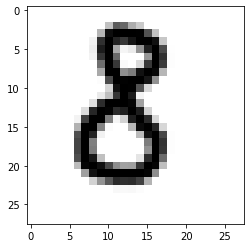

In [67]:
from PIL import Image

im = Image.open("8.png").convert('L')
im = im.resize((28,28))
x = tc.tensor( im.getdata() )
plt.imshow(x.reshape(28,28), cmap='gray')


위의 이미지는 배경이 흰색이므로 검은색으로 변환한다. 

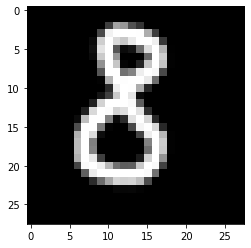

In [33]:
x = 255 - x 
plt.imshow(x.reshape(28,28), cmap='gray')



이제 이 이미지를 model 에 넣어보도록  하겠다. 

In [34]:
x = x.type(tc.FloatTensor).to(cuda)
tc.argmax(model(x))

tensor(5, device='cuda:0')

### 위치보정 사용

안타깝지만 생각보다 결과가 잘 나오지 안을 것이다. 사실 우리가 사용하는 신경망은 어디까지나 픽셀의 고정위치의 밝기를 기준으로 하기 때문에 이미지의 크기와 여백등에 영향을 크게 받는다. 다음 함수 reloacte 는 numpy 이미지의 위치를 재 배치하고 일정 여백을 줘서 보정한다. 

In [36]:
def relocate(src):  ## 숫자 이미지의 위치를 보정하고 여백을 추가한다.
  xsum = np.sum(src , axis = 0) > 0 
  ysum = np.sum(src , axis = 1) > 0 

  img = src[:, xsum]
  img = img[ysum, :]

  paddx = int( abs(img.shape[0] - img.shape[1] ) / 2 )
  return np.pad(img, ((10,10), (paddx+10,paddx+10)) )



이제 위의 함수를 사용해 이미지를 보정해보도록 하겠다. 

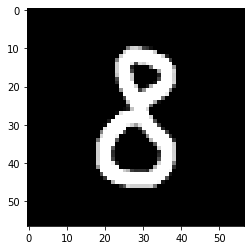

In [38]:
img = Image.open("8.png").convert('L')
w,h = img.size
src = np.array( img.getdata() ).reshape(h,w)

src = 255 - src
src = relocate(src)
plt.imshow( src, cmap = 'gray' )
plt.show() 


또 다른 문제는 위의 이미지를 28x28 로 변환해야한다는 것인데.. 이것은 nn.functional 의 interpolate 함수를 사용한다. 다만 이 함수는 앞에 2개의 더미차원을 요구하기 때문에 다음과 같이 실행한다. 

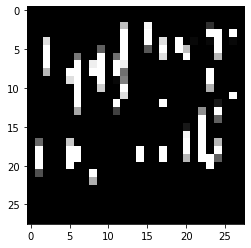

In [112]:
import torch.nn.functional as F 

x = tc.FloatTensor(src)
x = F.interpolate( x[None,None,:,:], (28,28) )

plt.imshow(x.view(28,28), cmap = 'gray')

이제 준비가 되었으니 위의 x 를 reshape 해서 cuda 에 올려 결과를 판별해보도록 하겠다. 

In [113]:
x = x.to(cuda).reshape(28*28) 
print( tc.argmax( model( x ) ) )

tensor(2, device='cuda:0')



### 여러 숫자 이미지 판별

끝으로  다음과 같은 여러 숫자가 들어있는 이미지를 이용해 판별하는 코드를 한번 구경하자
<img src = "https://github.com/decoz/mlclass/blob/master/images/t_nums2.png?raw=true" align = "left">


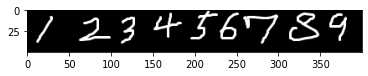

In [131]:
import numpy as np
import matplotlib.pyplot as plt

img = Image.open("num.png").convert('L')
w,h = img.size

src = np.array( img.getdata() ).reshape(h,w)
src = 255 - src

plt.imshow( src, cmap = 'gray' )
plt.show() 

다음은 이런 이미지의 빈 영역을 삭제하고 이미지를 잘라낸 후 이미지를 보정하는  코드이다. 

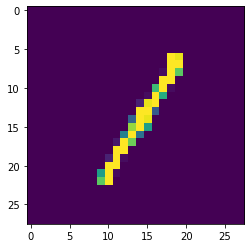

tensor(1, device='cuda:0')


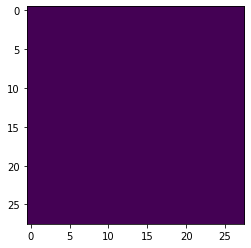

tensor(7, device='cuda:0')


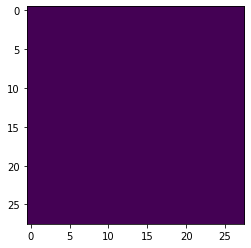

tensor(7, device='cuda:0')


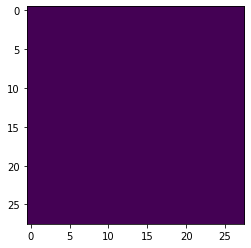

tensor(7, device='cuda:0')


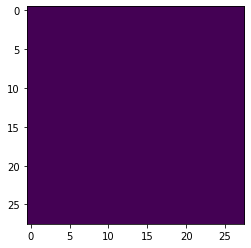

tensor(7, device='cuda:0')


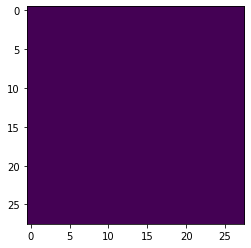

tensor(7, device='cuda:0')


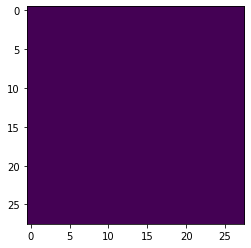

tensor(7, device='cuda:0')


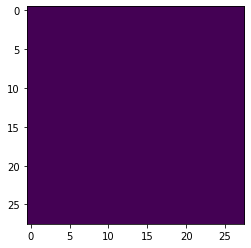

tensor(7, device='cuda:0')


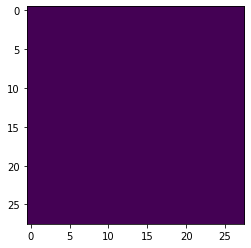

tensor(7, device='cuda:0')


In [132]:
ysum = np.sum(src, axis = 0)

thresh = 0
s = -1

for x in range(w):
  if s >= 0 and ysum[x] <= thresh : 
    src = relocate( src[:, s:x] )

    x = tc.FloatTensor(src)
    x = F.interpolate( x[None, None, :, :], (28, 28))

    plt.imshow(x.view(28, 28))
    plt.show()

    x = x.view(28*28).to(cuda)
    print( tc.argmax( model(x) ))
 
    s = -1 

  elif s < 0 and ysum[x] > thresh  :
    s = x

### <font color = '#FF7050'> 실습 : 여러 숫자값 판별하기 
위의 코드를 이용해 여러 숫자가 들어있는 이미지를 판별하도록 해보자
</font>

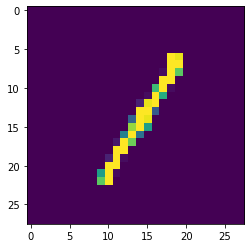

tensor(1, device='cuda:0')


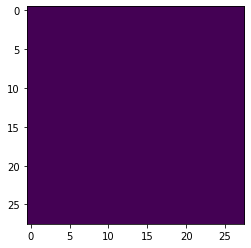

tensor(7, device='cuda:0')


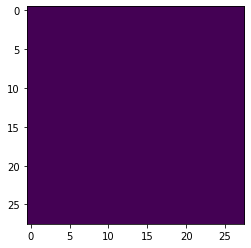

tensor(7, device='cuda:0')


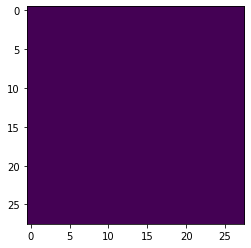

tensor(7, device='cuda:0')


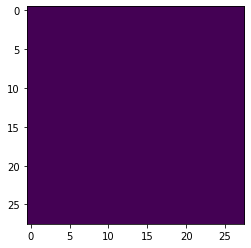

tensor(7, device='cuda:0')


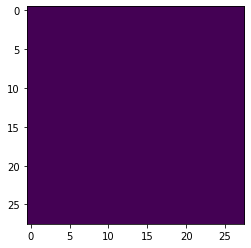

tensor(7, device='cuda:0')


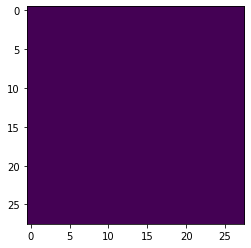

tensor(7, device='cuda:0')


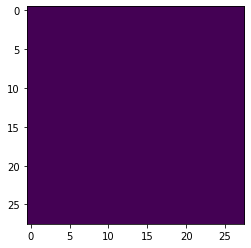

tensor(7, device='cuda:0')


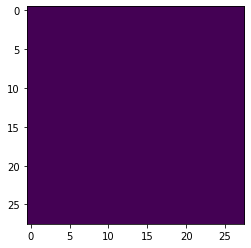

tensor(7, device='cuda:0')


In [130]:
## 이 코드를 수정해 여러 숫자가 들어있는 이미지를 판별할 수 있도록 해보세요
ysum = np.sum(src, axis = 0)

thresh = 0
s = -1

for x in range(w):
  if s >= 0 and ysum[x] <= thresh : 
    src = relocate( src[:, s:x] )

    x = tc.FloatTensor(src)
    x = F.interpolate( x[None, None, :, :], (28, 28))

    plt.imshow(x.view(28, 28))
    plt.show()

    x = x.view(28*28).to(cuda)
    print( tc.argmax( model(x) ))
 
    s = -1 

  elif s < 0 and ysum[x] > thresh  :
    s = x